<a href="https://colab.research.google.com/github/Pratch-yani/Face_Shape_Classification/blob/main/3_CNN_MODELLING_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project:  Face Shape Classification - Part 3

This notebook explores Convolutional Neural Network (CNN) Models on different image datasets based on the following image preprocessing:

- Model 1: Auto resized to 224 x 224
- Model 2: Images are cropped & resized by maintaining aspect ratio
- Model 3: Face Detection with Bounding Box in Grayscale
- Model 4: Face Detection with Bounding Box in Color (RGB)

This is initial exploratory phase to see which model generates the highest accuracy, while minimizing overfitting (gap between validation accuracy vs. training accuracy).  We will also plot confusion matrix to see how accurate is the model predicting each class (in this case, face shape).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import Libraries

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline


#### Define Functions

In [ ]:
def plot_results(mod_history, metric, epochs):
      
      # Check out our train loss and test loss over epochs.
      train_metric = mod_history.history[metric]
      val = 'val_' + metric
      test_metric = mod_history.history[val]

      # Set figure size.
      plt.figure(figsize=(12, 8))

      # Generate line plot of training, testing loss over epochs.
      plt.plot(train_metric, label=f'Training {metric}', color='#185fad')
      plt.plot(test_metric, label=f'Testing {metric}', color='orange')

      # Set title
      plt.title(f'Training and Testing {metric} by Epoch', fontsize = 25)
      plt.xlabel('Epoch', fontsize = 18)
      plt.ylabel('Categorical Crossentropy', fontsize = 18)
      plt.xticks(range(0,epochs,5), range(0,epochs,5))
      plt.legend(fontsize = 18);

In [ ]:
def make_predictions(mod_name, steps=20):
    preds = mod_name.predict(X_test,steps=steps)
    preds = preds.argmax(axis=-1)

    y_test_labels = np.argmax(y_test, axis=-1)

    cm = confusion_matrix(y_test_labels,preds)

    plot_confusion_matrix(cm, cm_plot_labels, normalize=True,
                          title='Face Shape Normalized')

    plt.show()



In [ ]:
cm_plot_labels = ['Heart','Oblong','Oval','Round', 'Square']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
def plot_summary_results(mod_name, mod_history, epochs):
    plot_results(mod_history, 'loss',epochs)
    plot_results(mod_history, 'accuracy', epochs)
    make_predictions(mod_name)

## <span style = 'color:sienna'>Model 1: GRAYSCALE images - resize to 224x224</span>  

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/data/"

X_train = np.asarray(pickle.load(open(path + "X_train_r224.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_r224.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_r224.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_r224.pickle","rb")))

In [ ]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (4000, 224, 224, 1)
y_train shape (4000, 5)
--------------------
X_test shape (1000, 224, 224, 1)
y_test shape (1000, 5)


In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_1.add(Dropout(0.5))  ##added
model_1.add(Dense(5, activation='softmax'))

model_1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 222, 222, 8)       80        
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 109, 109, 16)      1168      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 52, 52, 64)        9280      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
history_1 = model_1.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=150,
                        validation_data=(X_test, y_test))

Epoch 1/150
125/125 [==============================] - 2s 12ms/step - loss: 1.6129 - accuracy: 0.2042 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 2/150
125/125 [==============================] - 1s 10ms/step - loss: 1.6081 - accuracy: 0.2087 - val_loss: 1.5995 - val_accuracy: 0.2440
Epoch 3/150
125/125 [==============================] - 1s 10ms/step - loss: 1.5894 - accuracy: 0.2542 - val_loss: 1.5785 - val_accuracy: 0.2650
Epoch 4/150
125/125 [==============================] - 1s 10ms/step - loss: 1.5605 - accuracy: 0.2730 - val_loss: 1.5436 - val_accuracy: 0.3160
Epoch 5/150
125/125 [==============================] - 1s 10ms/step - loss: 1.5421 - accuracy: 0.2990 - val_loss: 1.5217 - val_accuracy: 0.3280
Epoch 6/150
125/125 [==============================] - 1s 10ms/step - loss: 1.5169 - accuracy: 0.3108 - val_loss: 1.5225 - val_accuracy: 0.3220
Epoch 7/150
125/125 [==============================] - 1s 10ms/step - loss: 1.4949 - accuracy: 0.3245 - val_loss: 1.4919 - val_accuracy:

In [ ]:
# max validation score @ Epoch 115/150
max(history_1.history['val_accuracy'])

0.4269999861717224

Maximum validation accuracy is 42.7%, however is highly overfitting compared to training accuracy of 73.9%.

In [ ]:
model_1.evaluate(X_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 4.2188 - accuracy: 0.4070


[4.218800067901611, 0.40700000524520874]

Normalized confusion matrix
[[0.455 0.175 0.185 0.105 0.08 ]
 [0.26  0.375 0.22  0.075 0.07 ]
 [0.28  0.115 0.335 0.17  0.1  ]
 [0.145 0.08  0.17  0.44  0.165]
 [0.165 0.08  0.18  0.145 0.43 ]]


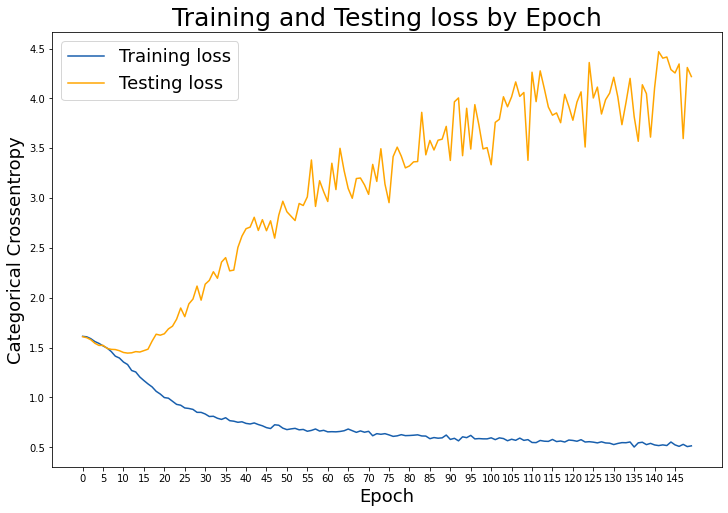

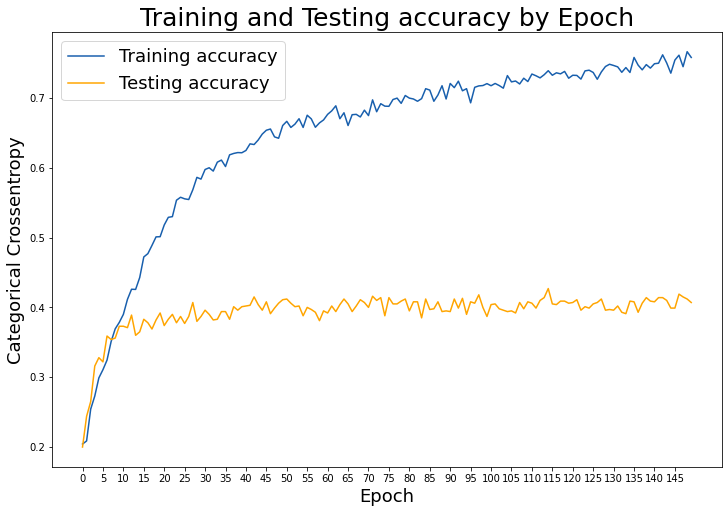

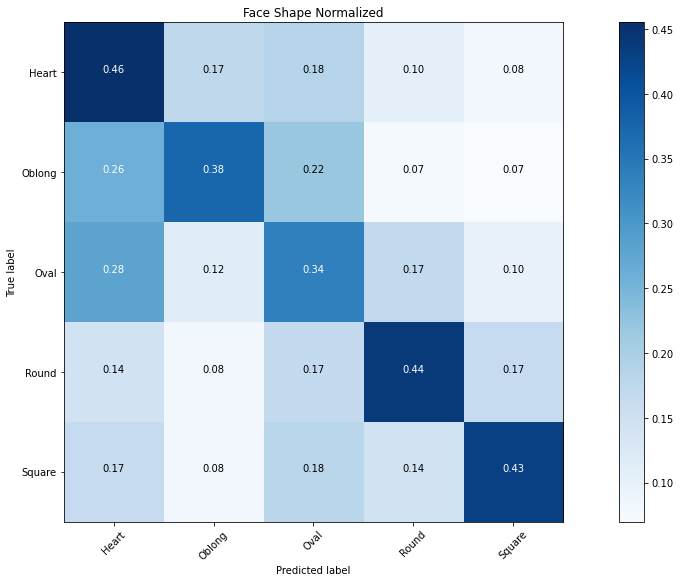

In [ ]:
plot_summary_results(model_1, history_1, 150)

In [ ]:
model_path = '/content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/'
tf.keras.models.save_model(
    model_1, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None)

filename = model_path + 'resize_oct12_3'   # change the filename for new iterations
model_1.save(filename)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/resize_oct12_3/assets


## <span style = 'color:sienna'>Model 2: GRAYSCALE images - crop & resize keeping aspect ratio</span>  

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/data/"

X_train = np.asarray(pickle.load(open(path + "X_train_apr.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_apr.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_apr.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_apr.pickle","rb")))

In [ ]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")


Data Summary
--------------------
X_train shape (4000, 224, 224, 1)
y_train shape (4000, 5)
--------------------
X_test shape (1000, 224, 224, 1)
y_test shape (1000, 5)


In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_2.add(Dropout(0.5))  ##added
model_2.add(Dense(5, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 222, 222, 8)       80        
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 109, 109, 16)      1168      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 52, 52, 64)        9280      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 24, 24, 128)     

In [ ]:
history_2 = model_2.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=150,
                        validation_data=(X_test, y_test))

Epoch 1/150
125/125 [==============================] - 1s 12ms/step - loss: 1.6107 - accuracy: 0.1870 - val_loss: 1.6093 - val_accuracy: 0.1970
Epoch 2/150
125/125 [==============================] - 1s 10ms/step - loss: 1.6072 - accuracy: 0.2010 - val_loss: 1.6023 - val_accuracy: 0.2800
Epoch 3/150
125/125 [==============================] - 1s 10ms/step - loss: 1.5920 - accuracy: 0.2485 - val_loss: 1.5695 - val_accuracy: 0.3000
Epoch 4/150
125/125 [==============================] - 1s 10ms/step - loss: 1.5583 - accuracy: 0.2943 - val_loss: 1.5330 - val_accuracy: 0.3230
Epoch 5/150
125/125 [==============================] - 1s 10ms/step - loss: 1.5199 - accuracy: 0.3200 - val_loss: 1.5171 - val_accuracy: 0.3530
Epoch 6/150
125/125 [==============================] - 1s 10ms/step - loss: 1.4639 - accuracy: 0.3438 - val_loss: 1.4837 - val_accuracy: 0.3780
Epoch 7/150
125/125 [==============================] - 1s 10ms/step - loss: 1.4117 - accuracy: 0.3760 - val_loss: 1.4367 - val_accuracy:

In [ ]:
# max validation score @ Epoch 38/150
max(history_2.history['val_accuracy'])

0.4729999899864197

Maximum validation accuracy is 47.3%, however is highly overfitting compared to training accuracy of 72.5%.

In [ ]:
model_2.evaluate(X_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 4.2774 - accuracy: 0.4420


[4.277387619018555, 0.44200000166893005]

Normalized confusion matrix
[[0.4   0.165 0.22  0.125 0.09 ]
 [0.175 0.47  0.215 0.065 0.075]
 [0.215 0.185 0.315 0.15  0.135]
 [0.085 0.095 0.14  0.455 0.225]
 [0.08  0.055 0.135 0.16  0.57 ]]


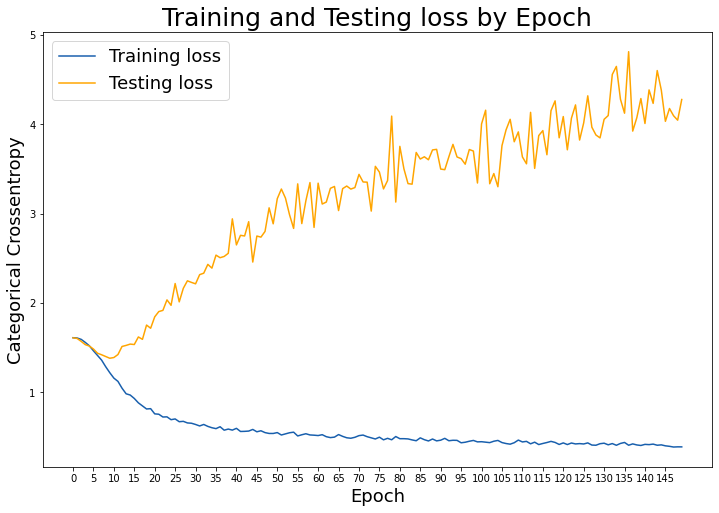

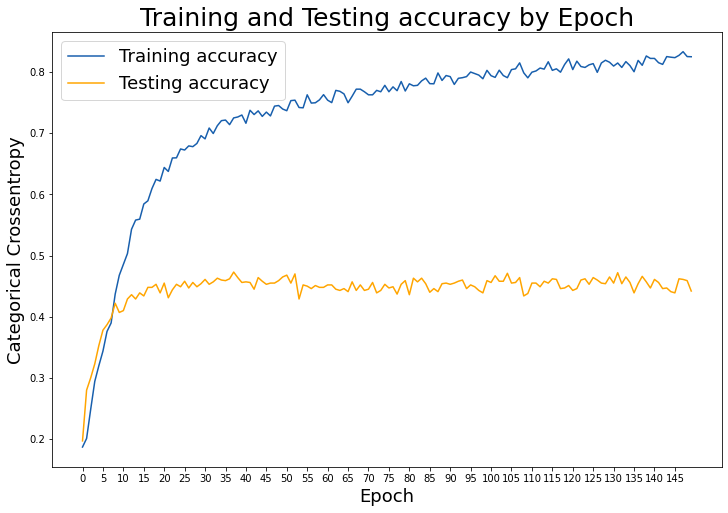

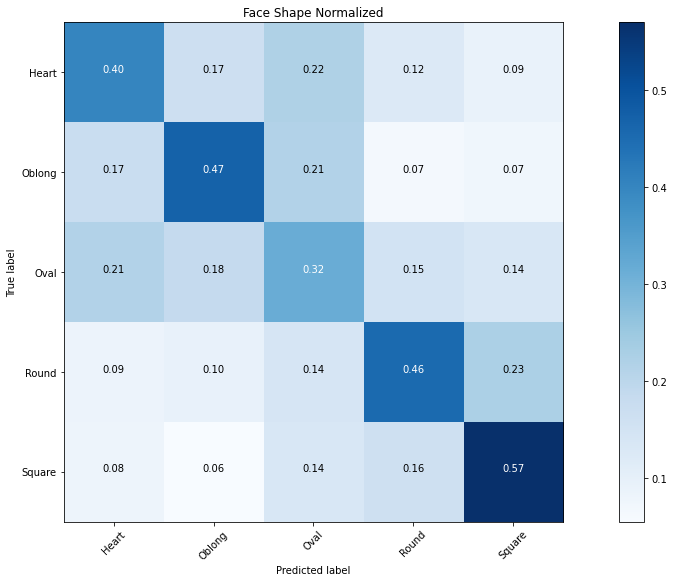

In [ ]:
plot_summary_results(model_2, history_2, 150)

In [ ]:
model_path = '/content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/'
tf.keras.models.save_model(
    model_2, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None)

filename = model_path + 'crop_oct12_3'   # change the filename for new iterations
model_2.save(filename)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/crop_oct12_3/assets


## <span style = 'color:sienna'>Model 3: GRAYSCALE images - Detect Face with Bounding Box</span>  

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/data/"

X_train = np.asarray(pickle.load(open(path + "X_train_gray.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_gray.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_gray.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_gray.pickle","rb")))

In [ ]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")


Data Summary
--------------------
X_train shape (4000, 224, 224, 1)
y_train shape (4000, 5)
--------------------
X_test shape (1000, 224, 224, 1)
y_test shape (1000, 5)


In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_3.add(Dropout(0.5))  ##added
model_3.add(Dense(5, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 222, 222, 8)       80        
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 109, 109, 16)      1168      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 52, 52, 64)        9280      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 24, 24, 128)     

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0,  
                           patience=5, mode='auto')

In [ ]:
history_3 = model_3.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=250,
                        validation_data=(X_test, y_test))

Epoch 1/250
125/125 [==============================] - 2s 12ms/step - loss: 1.6100 - accuracy: 0.2062 - val_loss: 1.5963 - val_accuracy: 0.2570
Epoch 2/250
125/125 [==============================] - 1s 10ms/step - loss: 1.5620 - accuracy: 0.2770 - val_loss: 1.4707 - val_accuracy: 0.3750
Epoch 3/250
125/125 [==============================] - 1s 10ms/step - loss: 1.4766 - accuracy: 0.3250 - val_loss: 1.3770 - val_accuracy: 0.4080
Epoch 4/250
125/125 [==============================] - 1s 10ms/step - loss: 1.3968 - accuracy: 0.3652 - val_loss: 1.4231 - val_accuracy: 0.4520
Epoch 5/250
125/125 [==============================] - 1s 10ms/step - loss: 1.3566 - accuracy: 0.3940 - val_loss: 1.2630 - val_accuracy: 0.4910
Epoch 6/250
125/125 [==============================] - 1s 10ms/step - loss: 1.2941 - accuracy: 0.4215 - val_loss: 1.2280 - val_accuracy: 0.5090
Epoch 7/250
125/125 [==============================] - 1s 10ms/step - loss: 1.2470 - accuracy: 0.4455 - val_loss: 1.1808 - val_accuracy:

In [ ]:
# max validation score @ Epoch 83/250
max(history_3.history['val_accuracy'])

0.6859999895095825

Maximum validation accuracy is 68.6%, which is much higher than previous models ~40%, hence the bounding box improved accuracy.  However, the model is still overfitting with training accuracy of 76.73%.

In [ ]:
model_3.evaluate(X_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 2.6026 - accuracy: 0.6530


[2.6026155948638916, 0.652999997138977]

Normalized confusion matrix
[[0.605 0.12  0.105 0.15  0.02 ]
 [0.05  0.875 0.055 0.01  0.01 ]
 [0.18  0.14  0.415 0.175 0.09 ]
 [0.055 0.02  0.105 0.765 0.055]
 [0.055 0.045 0.045 0.25  0.605]]


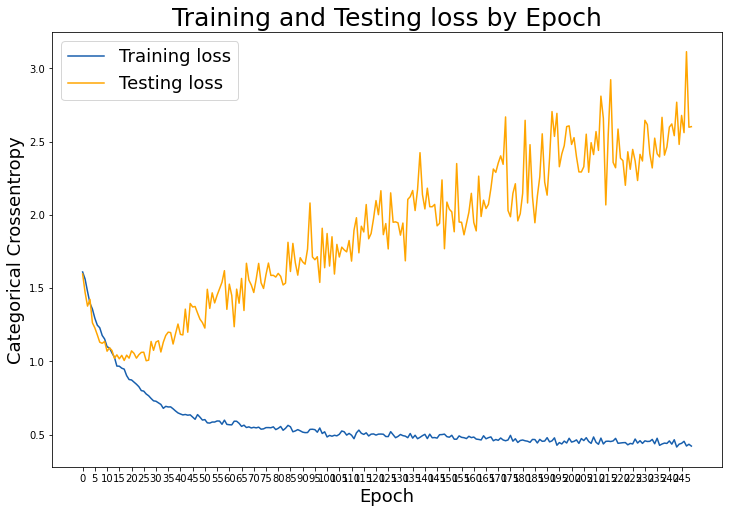

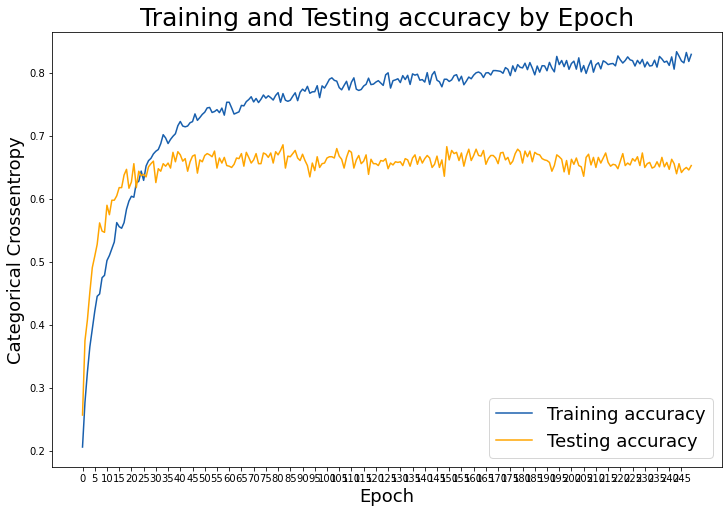

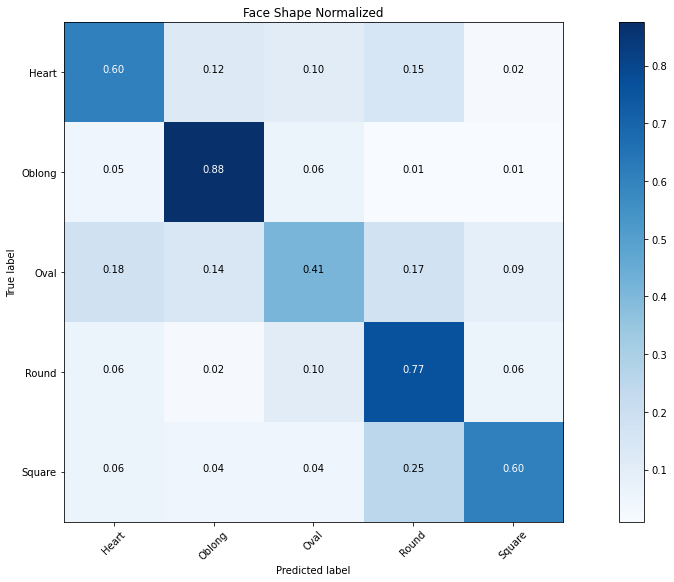

In [ ]:
plot_summary_results(model_3, history_3, 250)

In [ ]:
model_path = '/content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/'
tf.keras.models.save_model(
    model_3, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None)

filename = model_path + 'gray_oct12_3'   # change the filename for new iterations
model_3.save(filename)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/gray_oct12_3/assets


## <span style = 'color:sienna'>Model 4: RGB COLOR images - Detect Face with Bounding Box</span>  

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/data/"

X_train = np.asarray(pickle.load(open(path + "X_train_rgb.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_rgb.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_rgb.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_rgb.pickle","rb")))

In [ ]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")


Data Summary
--------------------
X_train shape (4000, 224, 224, 3)
y_train shape (4000, 5)
--------------------
X_test shape (1000, 224, 224, 3)
y_test shape (1000, 5)


In [ ]:
model_4 = Sequential()
model_4.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Flatten())
model_4.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_4.add(Dropout(0.5))  ##added
model_4.add(Dense(5, activation='softmax'))

model_4.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 109, 109, 16)      1168      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 52, 52, 64)        9280      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 128)     

In [ ]:
history_4 = model_4.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=250,
                        validation_data=(X_test, y_test)) #,
                        #callbacks=[early_stop])

Epoch 1/250
125/125 [==============================] - 2s 17ms/step - loss: 1.5842 - accuracy: 0.2655 - val_loss: 1.5223 - val_accuracy: 0.3430
Epoch 2/250
125/125 [==============================] - 2s 15ms/step - loss: 1.4959 - accuracy: 0.3425 - val_loss: 1.4235 - val_accuracy: 0.4090
Epoch 3/250
125/125 [==============================] - 2s 15ms/step - loss: 1.3606 - accuracy: 0.4370 - val_loss: 1.2902 - val_accuracy: 0.4870
Epoch 4/250
125/125 [==============================] - 2s 15ms/step - loss: 1.2584 - accuracy: 0.4683 - val_loss: 1.1972 - val_accuracy: 0.5090
Epoch 5/250
125/125 [==============================] - 2s 15ms/step - loss: 1.1983 - accuracy: 0.5033 - val_loss: 1.1408 - val_accuracy: 0.5550
Epoch 6/250
125/125 [==============================] - 2s 14ms/step - loss: 1.1485 - accuracy: 0.5167 - val_loss: 1.1110 - val_accuracy: 0.5540
Epoch 7/250
125/125 [==============================] - 2s 15ms/step - loss: 1.0912 - accuracy: 0.5460 - val_loss: 1.0841 - val_accuracy:

In [ ]:
# max validation score @ Epoch 238/250
max(history_4.history['val_accuracy'])

0.7120000123977661

Maximum validation accuracy is 71.2%, which is much higher than first 2 models ~40%, but close to model 3 with the same bounding box cropping but with grayscale images.  However, the model is highly overfitting with training accuracy of 94.17%.


In [ ]:
model_4.evaluate(X_test, y_test)

32/32 [==============================] - 0s 9ms/step - loss: 2.6205 - accuracy: 0.6870


[2.6204516887664795, 0.6869999766349792]

Normalized confusion matrix
[[0.555 0.105 0.14  0.155 0.045]
 [0.05  0.785 0.125 0.02  0.02 ]
 [0.11  0.105 0.61  0.135 0.04 ]
 [0.04  0.03  0.1   0.76  0.07 ]
 [0.04  0.05  0.065 0.12  0.725]]


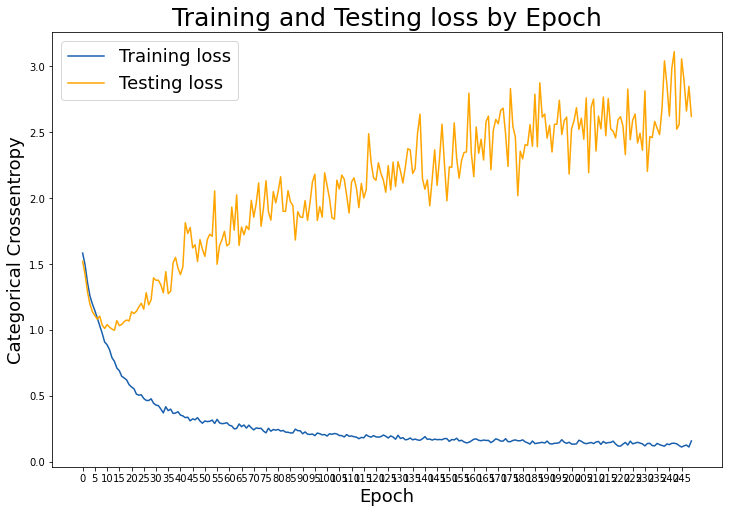

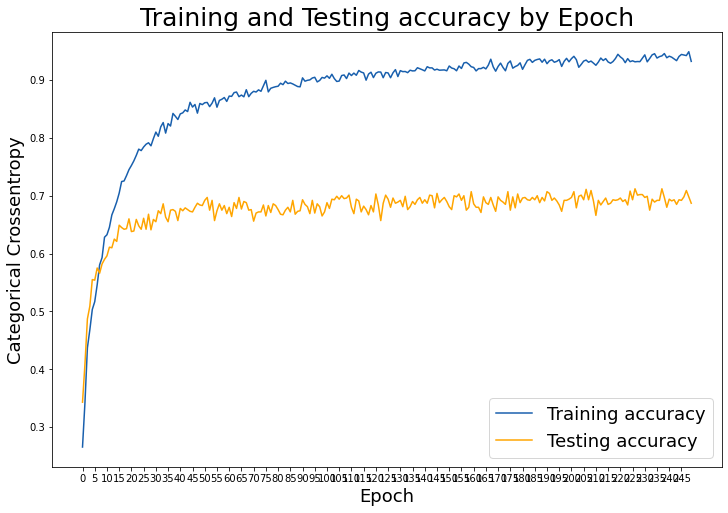

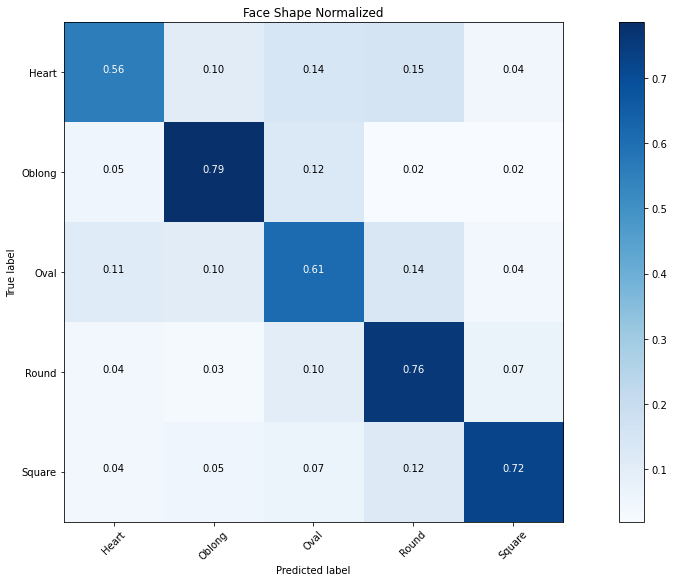

In [ ]:
plot_summary_results(model_4, history_4, 250)

## Save the model and weights

In [ ]:
model_path = '/content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/'
tf.keras.models.save_model(
    model_4, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None)

filename = model_path + 'rgb_oct12_3'   # change the filename for new iterations
model_4.save(filename)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Face_Shape_Classification/saved_models/extra/rgb_oct12_3/assets


Check that the saved model works

In [ ]:
# Load in the saved model

loaded_model = tf.keras.models.load_model(filename)

# Compare the predictions from the model_4 vs. the saved version of model_4
mod4_predict = model_4.predict_classes(X_test)
loaded4_predict = loaded_model.predict_classes(X_test)




In [ ]:
# Check the difference

print(f'Difference in predictions: Saved model vs. original model is {np.sum(loaded4_predict - mod4_predict)}')

Difference in predictions: Saved model vs. original model is 0


The difference = 0 means the file is saved correctly!

**Conclusion** The bounding box helps improve accuracy as seen in models 3 & 4.  Model 4 with RGB color images performed slightly better than Model 3 with grayscale images.  However, both models 3 & 4 are overfitting.

We will move forward using RGB color images.

In the next notebooks we will explore image augmentation to help address the overfitting issue, while also explore transfer learning to help improve accuracy with pretrained models.